In [1]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import sympy as sym
import math
import numpy as np
from IPython import display
import time
from scipy import integrate as integ
import sys
import time

sys.path.append('src')
import deepymod_torch.VE_datagen as VE_datagen

In [2]:
# This is a function I have stolen from Pietro Battiston's answer at
# https://stackoverflow.com/questions/10481990/matplotlib-axis-with-two-scales-shared-origin
def align_yaxis(ax1, ax2):
    """Align zeros of the two axes, zooming them out by same ratio"""
    axes = (ax1, ax2)
    extrema = [ax.get_ylim() for ax in axes]
    tops = [extr[1] / (extr[1] - extr[0]) for extr in extrema]
    # Ensure that plots (intervals) are ordered bottom to top:
    if tops[0] > tops[1]:
        axes, extrema, tops = [list(reversed(l)) for l in (axes, extrema, tops)]

    # How much would the plot overflow if we kept current zoom levels?
    tot_span = tops[1] + 1 - tops[0]

    b_new_t = extrema[0][0] + tot_span * (extrema[0][1] - extrema[0][0])
    t_new_b = extrema[1][1] - tot_span * (extrema[1][1] - extrema[1][0])
    axes[0].set_ylim(extrema[0][0], b_new_t)
    axes[1].set_ylim(t_new_b, extrema[1][1])

In [6]:
x_1 = np.linspace(-10, 10, 5000)
sin_creator = lambda k: lambda x: np.sin(k*x)

sinc_creator = lambda k: lambda x: np.sin(k*x)/(k*x)
d_sinc_creator = lambda k: lambda x: (1/x)*(np.cos(k*x) - np.sin(k*x)/(k*x))
d_d_sinc_creator = lambda k: lambda x: (-1/x)*(2*np.cos(k*x) + np.sin(k*x)*(k - 2/(k*x)))

pseudo_sinc_creator = lambda k: lambda x: np.sin(k*x)/x
d_pseudo_sinc_creator = lambda k: lambda x: (1/x)*(k*np.cos(k*x) - np.sin(k*x)/x)
d_d_pseudo_sinc_creator = lambda k: lambda x: (-1/x)*(2*k*np.cos(k*x)/x + np.sin(k*x)*(k**2 - 2/(x**2)))

y_1 = d_d_sinc_creator(1)
y_2 = d_d_sinc_creator(5)
y_3 = d_d_sinc_creator(10)
y = lambda x: result_lambda(x)
z = lambda x: integral_lambda(x)
a = lambda x: input_expr(x)

NameError: name 'result_lambda' is not defined

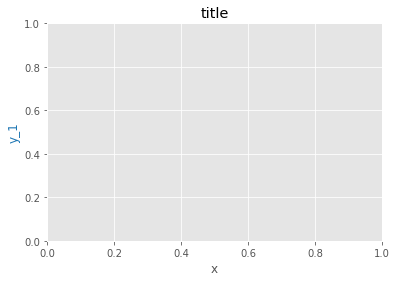

In [17]:
fig, ax1 = plt.subplots()

plt.title('title')
ax1.set_xlabel('x')

#Set up Strain on first axis
colour = 'tab:blue'
ax1.set_ylabel('y_1', color=colour)
ax1.plot(x, y(x), color=colour)
ax1.tick_params(axis='y', labelcolor=colour)

#Create Second axis. twinx means that the new axes share the same x axis. twiny also exists.
ax2 = ax1.twinx()

#Set up Stress on second axis
colour = 'tab:red'
ax2.set_ylabel('y_2', color=colour)  # we already handled the x-label with ax1
ax2.plot(x, z(x), color=colour)
ax2.tick_params(axis='y', labelcolor=colour)
ax2.set_ylim(ax1.get_ylim())

#align_yaxis(ax1, ax2) # Function not of my design.

fig.tight_layout()  # otherwise the right y-label is slightly clipped

if statically displaying a plot (sometimes not necessary.....?)

In [ ]:
plt.show()

if dynamically updating

In [ ]:
display.display(plt.gcf())

then, to update (would have to be in same code block)

In [ ]:
display.clear_output(wait=True)
ax2.clear()

colour = 'tab:red'
ax2.set_ylabel('y_2', color='tab:red')  # we already handled the x-label with ax1
ax2.plot(x, a(x), color='tab:red')
# next line seems to have issues but should work.....
#align_yaxis(ax1, ax2) # Function not of my design.

display.display(plt.gcf())